<div class="alert alert-block alert-info"><font size="3"><center><b><u>

    
ELIZABETH GONZALEZ - PRESENCIAL -TARDE 
DATA SCIENCE

SPRINT 4

S04 T01: Graphical summary for DelayedFlights.csv data set</div>

<span style='color:purple'>
<h3>Level 1</span>

<span style='color:purple'>
<h4>4.1.1 Exercise 

Create at least one visualization for:</span>

<span style='color:purple'>
<h4>!! Note:
Names of new columns and new tables still have uppercase letters because that is how we had them in the previous task</span>

In [45]:
#Import libraries
import pandas as pd # Importacion estandar de la libreria Pandas
import numpy  as np # Importacion estandar de la libreria NumPy
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 
import plotly.graph_objects as go
import cufflinks as cf
import dash
import warnings
import math
import cmath
from matplotlib import pylab, mlab, pyplot
from dash import dcc
from dash import html
from scipy import stats
from scipy.stats import norm
from scipy.stats import trim_mean
from dash.dependencies import Input, Output
from statsmodels.graphics.tsaplots import plot_acf
sns.set_theme(style="ticks")
%matplotlib inline
warnings.filterwarnings('ignore')

df = pd.read_csv ('/Users/elizabeth/Desktop/JUP_EGE/S03 T05/DelayedFlights.csv')  

layout = df
layout['row'] = np.arange(len(layout))

In [46]:
#Add the mean of statistically relevant columns in a new column

layout['arr_delay_mean']=layout['ArrDelay'].describe()['mean']
layout['dep_delay_mean']=layout['DepDelay'].describe()['mean']
layout['distance_mean']=layout['Distance'].describe()['mean']
layout['weather_delay_mean']=layout['WeatherDelay'].describe()['mean']
layout['carrier_delay_mean']=layout['CarrierDelay'].describe()['mean']

<span style='color:purple'>
<h4>* A numeric variable (ArrDelay)</span>

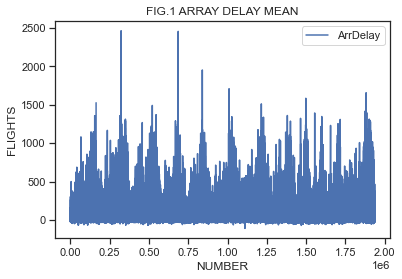

In [47]:
#Use column "row" as x and "ArrDelay" value as y to make graphic data
layout.groupby('row').mean().loc[:,['ArrDelay']].plot()
plt.title('FIG.1 ARRAY DELAY MEAN')
plt.xlabel('NUMBER')
plt.ylabel('FLIGHTS')
plt.savefig('fig1.png') 

<span style='color:purple'>
<h4>* A numeric variable (ArrDelay)</span>

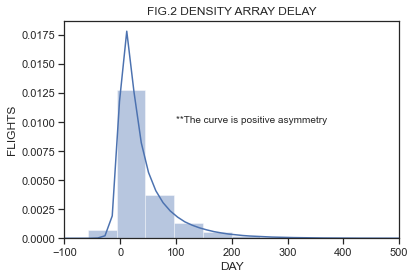

In [48]:
#Normal graphic for Arrive Delay using density function

data = np.random.randn(500)
sns.distplot(layout['ArrDelay'])
plt.xlim(-100, 500)
plt.text(100,.01, '**The curve is positive asymmetry')
plt.title('FIG.2 DENSITY ARRAY DELAY')
plt.xlabel('DAY')
plt.ylabel('FLIGHTS')
plt.savefig('fig2.png')

<span style='color:purple'>
<h4>* A categorical variable (UniqueCarrier)</span>

===================== HORIZONTAL BAR GRAPH FOR 1 VAR CAT ======================


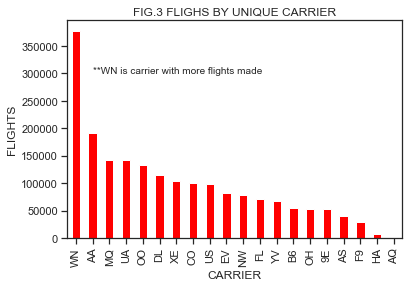

In [49]:
print('===================== HORIZONTAL BAR GRAPH FOR 1 VAR CAT ======================')
plot = layout['UniqueCarrier'].value_counts().plot(kind='bar', color='red')
plt.text(1,300000, '**WN is carrier with more flights made')
plt.title('FIG.3 FLIGHS BY UNIQUE CARRIER')
plt.xlabel('CARRIER')
plt.ylabel('FLIGHTS')
plt.savefig('fig3.png')

<span style='color:purple'>
<h4>* A categorical variable (UniqueCarrier)</span>

===================== VERTICAL BAR GRAPH FOR 1 VAR CAT ======================


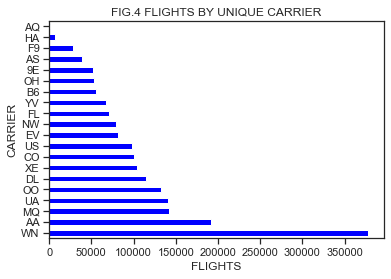

In [50]:
print('===================== VERTICAL BAR GRAPH FOR 1 VAR CAT ======================')
plot = layout['UniqueCarrier'].value_counts().plot(kind='barh',color='blue')
plt.title('FIG.4 FLIGHTS BY UNIQUE CARRIER')
plt.xlabel('FLIGHTS')
plt.ylabel('CARRIER')
plt.savefig('fig4.png')

<span style='color:purple'>
<h4>* A numeric variable and a categorical variable (ArrDelay and UniqueCarrier)</span>

===================== HORIZONTAL BAR GRAPH FOR 1 VAR NUM & 1 VAR CAT ======================


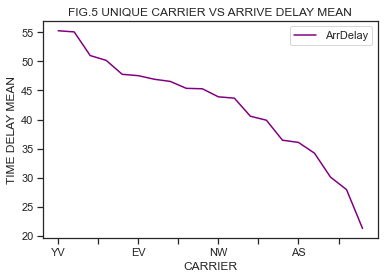

In [51]:
print('===================== HORIZONTAL BAR GRAPH FOR 1 VAR NUM & 1 VAR CAT ======================')
layout.groupby('UniqueCarrier').mean().loc[:,['ArrDelay']].sort_values(by='ArrDelay',ascending=False).plot(kind='line', color='purple')
plt.title('FIG.5 UNIQUE CARRIER VS ARRIVE DELAY MEAN')
plt.xlabel('CARRIER')
plt.ylabel('TIME DELAY MEAN')
plt.legend()
plt.savefig('fig5.png')

<span style='color:purple'>
<h4>* A numeric variable and a categorical variable (ArrDelay and UniqueCarrier)</span>

===================== HORIZONTAL BAR GRAPH FOR 1 VAR NUM & 1 VAR CAT ======================


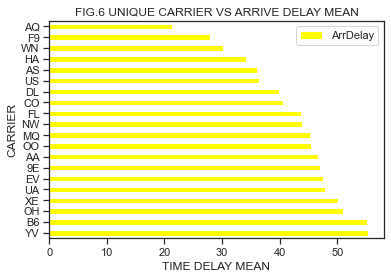

In [52]:
print('===================== HORIZONTAL BAR GRAPH FOR 1 VAR NUM & 1 VAR CAT ======================')
layout.groupby('UniqueCarrier').mean().loc[:,['ArrDelay']].sort_values(by='ArrDelay',ascending=False).plot(kind='barh', color='yellow')
plt.title('FIG.6 UNIQUE CARRIER VS ARRIVE DELAY MEAN')
plt.xlabel('TIME DELAY MEAN')
plt.ylabel('CARRIER')
plt.legend()
plt.savefig('fig6.png')

<span style='color:purple'>
<h4>* Dues variables numèriques (ArrDelay and DepDelay)</span>

===================== BAR GRAPHIC FOR 2 VAR NUM ======================


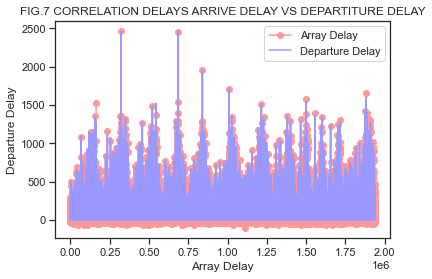

In [53]:
print('===================== BAR GRAPHIC FOR 2 VAR NUM ======================')
figC, Arr_Delay_Dep_Delay = plt.subplots(1, 1, figsize=(6,4))
Arr_Delay_Dep_Delay.plot(layout.ArrDelay, label='Array Delay', color='#ff9999', marker='o')
Arr_Delay_Dep_Delay.plot(layout.DepDelay, label='Departure Delay', color='#9999ff')
Arr_Delay_Dep_Delay.set_xlabel('Array Delay')
Arr_Delay_Dep_Delay.set_ylabel('Departure Delay')
Arr_Delay_Dep_Delay.set_title('FIG.7 CORRELATION DELAYS ARRIVE DELAY VS DEPARTITURE DELAY')
Arr_Delay_Dep_Delay.legend();
figC.savefig('fig7.png')

<span style='color:purple'>
<h4>* Dues variables numèriques (ArrDelay and DepDelay)</span>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


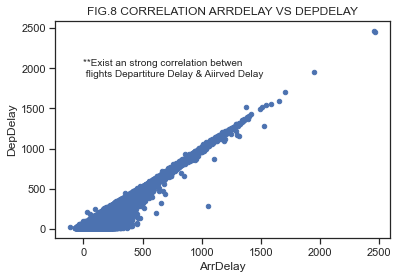

In [54]:
# Correlation
layout.plot(kind='scatter', y='DepDelay', x='ArrDelay')
plt.text(-.5,1900, '**Exist an strong correlation betwen\n flights Departiture Delay & Aiirved Delay')
plt.title('FIG.8 CORRELATION ARRDELAY VS DEPDELAY')
plt.savefig('fig8.png')

<span style='color:purple'>
<h4>* Three variables (ArrDelay, DepDelay i UniqueCarrier)</span>

===================== BAR GRAPHIC WITH 2 VAR NUM AND 1 VAR CAT ======================


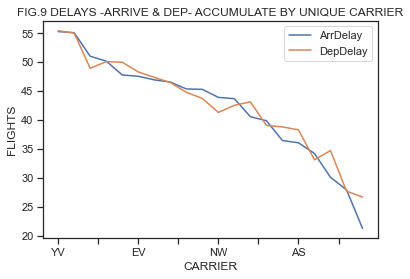

In [55]:
#Three variables , 2 numeric varibles and 1 variable categorical
print('===================== BAR GRAPHIC WITH 2 VAR NUM AND 1 VAR CAT ======================')
layout.groupby('UniqueCarrier').mean().loc[:,['ArrDelay','DepDelay']].sort_values(by='ArrDelay',ascending=False).plot(kind='line')
plt.title('FIG.9 DELAYS -ARRIVE & DEP- ACCUMULATE BY UNIQUE CARRIER')
plt.xlabel('CARRIER')
plt.ylabel('FLIGHTS')
plt.legend();
plt.savefig('fig9.png')

<span style='color:purple'>
<h4>* Three variables (ArrDelay, DepDelay i UniqueCarrier)</span>

===================== LINE GRAPHIC WITH 2 VAR NUM AND 1 VAR CAT ======================


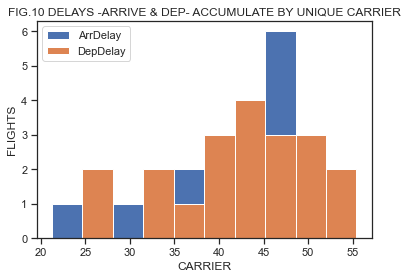

In [56]:
print('===================== LINE GRAPHIC WITH 2 VAR NUM AND 1 VAR CAT ======================')
layout.groupby('UniqueCarrier').mean().loc[:,['ArrDelay','DepDelay']].plot(kind='hist')
plt.title('FIG.10 DELAYS -ARRIVE & DEP- ACCUMULATE BY UNIQUE CARRIER')
plt.xlabel('CARRIER')
plt.ylabel('FLIGHTS')
plt.legend();
plt.savefig('fig10.png')

<span style='color:purple'>
<h4>* More than three variables (ArrDelay, DepDelay, AirTime and UniqueCarrier).</span>

===================== LINE GRAPHIC WITH 3 VAR NUM AND 1 VAR CAT ======================


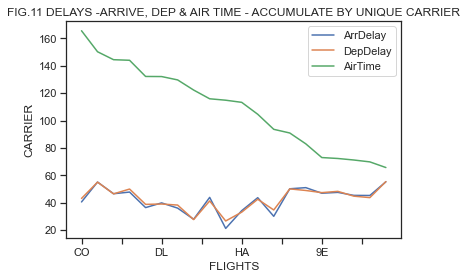

In [57]:
#Four variables , 3 numeric varibles and 1 variable categorical
print('===================== LINE GRAPHIC WITH 3 VAR NUM AND 1 VAR CAT ======================')
layout.groupby('UniqueCarrier').mean().loc[:,['ArrDelay','DepDelay','AirTime']].sort_values(by='AirTime',ascending=False).plot(kind='line')
plt.title('FIG.11 DELAYS -ARRIVE, DEP & AIR TIME - ACCUMULATE BY UNIQUE CARRIER')
plt.xlabel('FLIGHTS')
plt.ylabel('CARRIER')
plt.legend()
plt.savefig('fig11.png')

<span style='color:purple'>
<h4>* More than three variables (ArrDelay, DepDelay, AirTime and UniqueCarrier)</span>

===================== LINE GRAPHIC WITH 3 VAR NUM AND 1 VAR CAT ======================


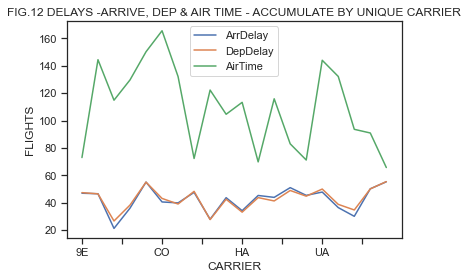

In [58]:
print('===================== LINE GRAPHIC WITH 3 VAR NUM AND 1 VAR CAT ======================')
layout.groupby('UniqueCarrier').mean().loc[:,['ArrDelay','DepDelay','AirTime']].plot(kind='line')
plt.title('FIG.12 DELAYS -ARRIVE, DEP & AIR TIME - ACCUMULATE BY UNIQUE CARRIER')
plt.xlabel('CARRIER')
plt.ylabel('FLIGHTS')
plt.legend()
plt.savefig('fig12.png')

<span style='color:purple'>
<h4>4.1.2 Exercise 
    
Export the graphics as images or as html</span>

In [59]:
#See file attach in GIITHUB

<span style='color:purple'>
<h4>4.1.3 Exercise 
    
Integrate the graphic visualizations, in booth 5, of Sprint 3</span>

<span style='color:purple'>
<h4>

A) Summarize the columns of interest statistically
</span>

In [60]:
#Extract the columns of interest
derived_layout = layout[['DepDelay', 'Distance', 'ActualElapsedTime', 'ArrDelay', 'WeatherDelay', 'SecurityDelay']]
print("DESCRIPTIVE STATISTICS:COLUMNS OF INTEREST")
new_table_stat= derived_layout.describe().round(2)
new_table_stat

DESCRIPTIVE STATISTICS:COLUMNS OF INTEREST


,DepDelay,Distance,ActualElapsedTime,ArrDelay,WeatherDelay,SecurityDelay
count,1936758.00,1936758.00,1928371.00,1928371.00,1247488.00,1247488.00
mean,43.19,765.69,133.31,42.20,3.70,0.09
std,53.40,574.48,72.06,56.78,21.49,2.02
min,6.00,11.00,14.00,-109.00,0.00,0.00
25%,12.00,338.00,80.00,9.00,0.00,0.00
50%,24.00,606.00,116.00,24.00,0.00,0.00
75%,53.00,998.00,165.00,56.00,0.00,0.00
max,2467.00,4962.00,1114.00,2461.00,1352.00,392.00


Text(0.5, 1.0, 'FIG.13 DISTRIBUTIONS AND RELATIONS IN DATASET')

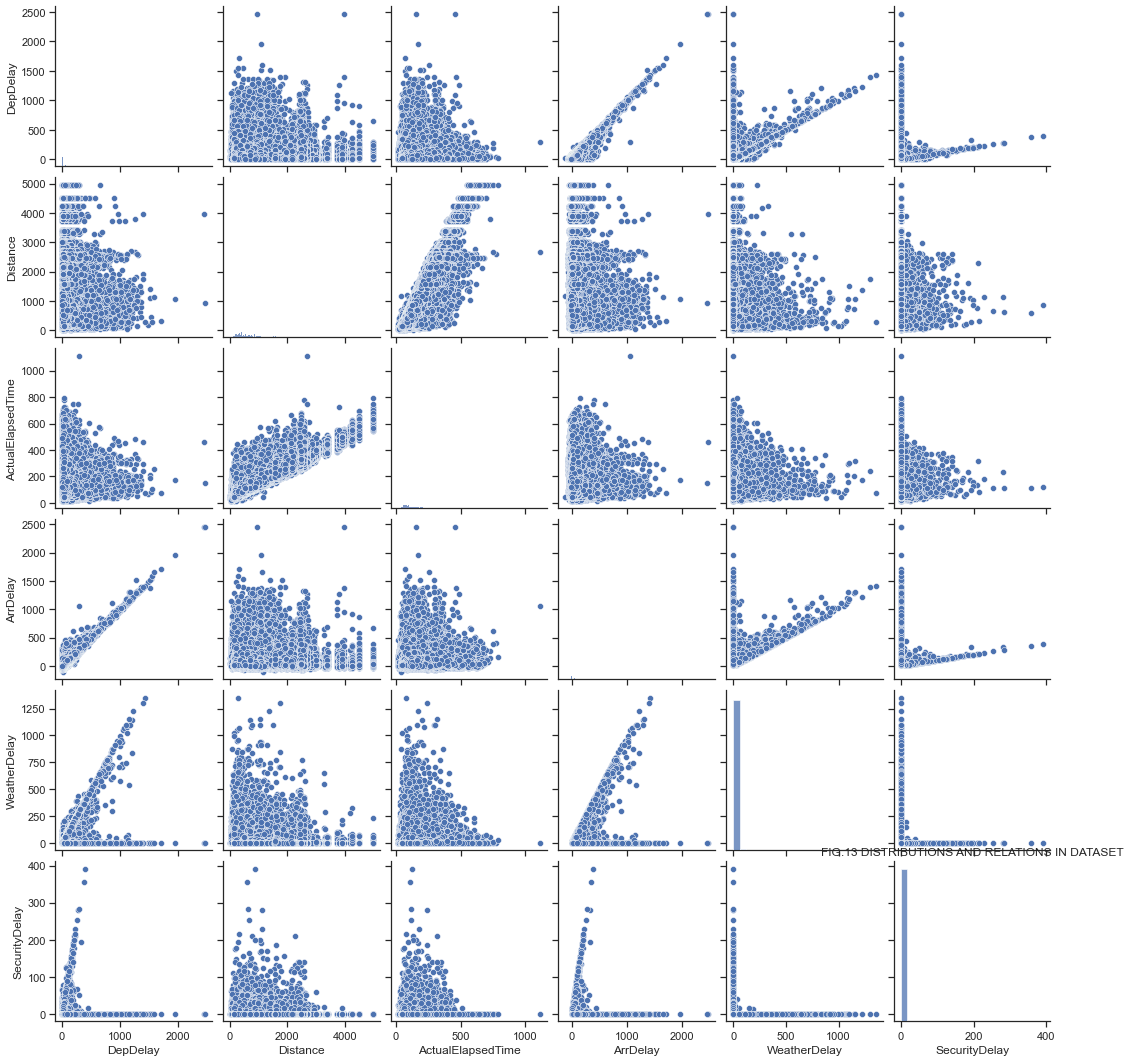

In [61]:
#graph of multiple bivariate distributions of data sets
sns.pairplot(derived_layout)
plt.title('FIG.13 DISTRIBUTIONS AND RELATIONS IN DATASET')

Text(0, 0.5, '')

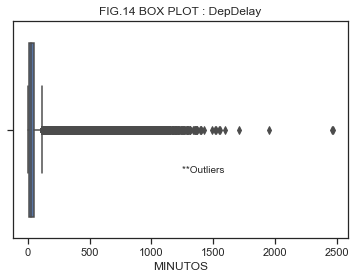

In [62]:
#Analisys for DepDelay, outliers & whiskers
sns.boxplot (x=layout['DepDelay'])
plt.text(1.9, .2, '                                                        **Outliers')
plt.title('FIG.14 BOX PLOT : DepDelay')
plt.xlabel('MINUTOS')
plt.ylabel('')

In [63]:
new_table_stat.dtypes

DepDelay             float64
Distance             float64
ActualElapsedTime    float64
ArrDelay             float64
WeatherDelay         float64
SecurityDelay        float64
dtype: object

[]

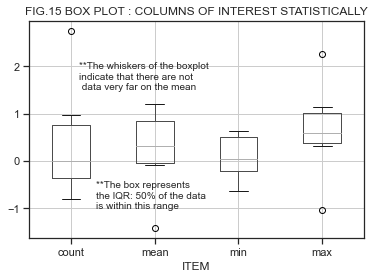

In [64]:
#Check arrival statistics for time departiture delay...
new_table_stat.columns
np.random.seed(5000000)
new_table_stat = pd.DataFrame(np.random.randn(6, 7), columns=['count', 'mean', 'min', '25%', '50%', '75%', 'max'])
boxplot = new_table_stat.boxplot(column=['count', 'mean', 'min', 'max'])
plt.text(1.3, -1.0, '**The box represents\nthe IQR: 50% of the data\nis within this range')
plt.text(1.1,1.5, '**The whiskers of the boxplot\nindicate that there are not \n data very far on the mean')
plt.title('FIG.15 BOX PLOT : COLUMNS OF INTEREST STATISTICALLY')
plt.xlabel('ITEM')
plt.ylabel('')
boxplot.plot()

<span style='color:purple'>
<h4>B)Find how many missing data are per column</span>

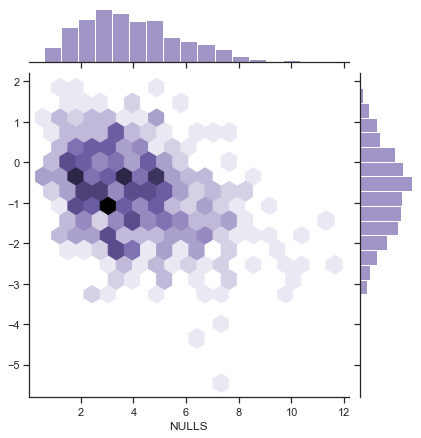

In [65]:
# Sumarize data null per column
layout_null= layout.isnull().sum()

# Hexbin plot with marginal distributions for nulls

layout_null = np.random.RandomState(11)
x = layout_null.gamma(4, size=500)
y = -.2 * x + rs.normal(size=500)
sns.jointplot(x=x, y=y, kind='hex', color='m')
plt.xlabel('NULLS')
plt.ylabel('')
plt.show()

<span style='color:purple'>
<h4>C) Create new columns: Average flight speed</span>

In [66]:
# Speed is equal to dictance over time flight

layout['Average_Flight_Speed'] = ((layout['Distance']/layout['ActualElapsedTime'])*60).round(2)

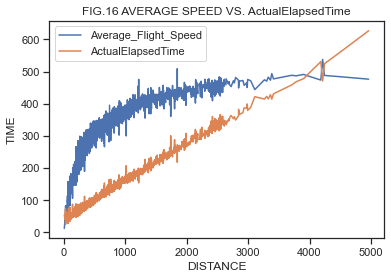

In [67]:
#Check impact speed on total time in air...
layout.groupby('Distance').mean().loc[:,['Average_Flight_Speed','ActualElapsedTime']].plot(kind='line')
plt.title('FIG.16 AVERAGE SPEED VS. ActualElapsedTime')
plt.xlabel('DISTANCE')
plt.ylabel('TIME')
plt.legend();
plt.show()

<span style='color:purple'>
<h4>D) Create new columns: Whether late or not</span>

In [68]:
import pandas as pd # Importacion estandar de la libreria Pandas


def Arrives(arrive):
    arrive = float(arrive.ArrDelay)
    
    if arrive <0:
        return 'Early'
    if arrive ==0:
        return 'On time'
    if arrive >0:
        return 'Late'
    else:
        return 'No avaiable'

layout['Arrived_OnTime_or_Not'] = pd.to_numeric(layout['ArrDelay'], errors='ignore')  
layout['Arrived_OnTime_or_Not'] = layout.apply(Arrives, axis=1)

#Print table with subtotals by status
print ('ARRIVAL STATUS SUBTOTALS')
tabla=layout.groupby(['Arrived_OnTime_or_Not']).size().reset_index(name='Total_Flight')
tabla

ARRIVAL STATUS SUBTOTALS


,Arrived_OnTime_or_Not,Total_Flight
0,Early,177916
1,Late,1723415
2,No avaiable,8387
3,On time,27040


Text(0.5, 1.0, '                           FIG.17 ARRIVAL STATUS FLIGHT "2008"')

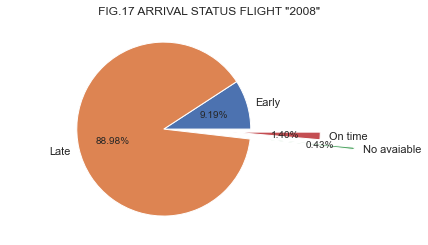

In [69]:
#Check status arrival...
explode_vals=[0,0,1.2,.8]
plt.pie(tabla['Total_Flight'],labels=tabla['Arrived_OnTime_or_Not'], autopct='%1.2f%%', explode = explode_vals)
plt.title('                           FIG.17 ARRIVAL STATUS FLIGHT "2008"')

<span style='color:purple'>
<h4>E) Table of airlines with the most accumulated arrears</span>

In [70]:
#To generate a table with largest delays flight by carrier I try severals subtables
#I will generate several subtables that I call lists but they are not actually lists

listCarrier = layout[['UniqueCarrier','Arrived_OnTime_or_Not']]
Table_List_Carrier1=listCarrier.groupby(["UniqueCarrier", 'Arrived_OnTime_or_Not'])['Arrived_OnTime_or_Not'].count()
listCarrier2 = layout[['UniqueCarrier','CarrierDelay']]
listCarrier2.sort_values(by = "CarrierDelay", ascending =False)
Table_List_Carrier3=listCarrier2.groupby(['UniqueCarrier','CarrierDelay']).size().reset_index(name='Total')

print('FIRTS FIVE CARRIERS WITH LONGER DELAY TIME ACCUMULATED IN "2008"')
Table_LongerD = listCarrier2.groupby('UniqueCarrier')['CarrierDelay'].sum().nlargest(5).reset_index(name='time_delays_acc')
Table_LongerD

FIRTS FIVE CARRIERS WITH LONGER DELAY TIME ACCUMULATED IN "2008"


,UniqueCarrier,time_delays_acc
0,AA,2821907.0
1,WN,2261002.0
2,YV,1906001.0
3,UA,1720150.0
4,MQ,1705271.0


Text(0, 0.5, 'TIME DELAY ACCUMULATE')

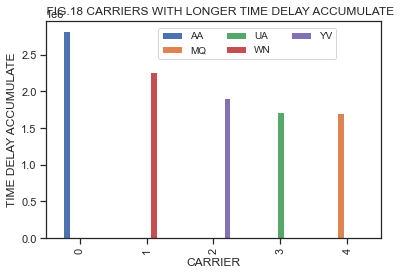

In [71]:
#Check top five carriers with more accumulate time delay...
Table_LongerD = listCarrier2.groupby('UniqueCarrier')['CarrierDelay'].sum().nlargest(5).reset_index(name='time_delays_acc')
Table_LongerD = Table_LongerD.pivot_table(values="time_delays_acc", columns="UniqueCarrier", index=Table_LongerD['UniqueCarrier'].index)
Table_LongerD.plot(kind="bar", legend=True)
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.6, .99),fontsize='medium', frameon=True)
plt.title('    FIG.18 CARRIERS WITH LONGER TIME DELAY ACCUMULATE')
plt.xlabel('CARRIER')
plt.ylabel('TIME DELAY ACCUMULATE')

<span style='color:purple'>
<h4>F) FWhat are the longest flights?</span>

In [72]:
#Create a list for review distance vs arrive delay
listDistance = layout[['Distance','Arrived_OnTime_or_Not']]

#Concatenate origin and destination for obtain the stretch of travel
layout['Flight_Origin_Dest'] = layout['Origin'] + ' - ' + layout['Dest']

#Convert to string column Flight_Origin_Dest
layout['Flight_Origin_Dest'] = layout['Flight_Origin_Dest'].astype('category')

#Create a list and sort it in descending order
listFlight1 = layout[['Flight_Origin_Dest','Distance','ArrDelay']]
listFlight2 = pd.pivot_table(listFlight1, index='Flight_Origin_Dest')
listFlight2.sort_values('Distance', inplace =True, ascending=False)

print ('FIRST FIVE LONGER TRIP CONSIDERING DISTANCE (Miles) : ORIGIN - DESTINATION'+ '')
Table_Longer=listFlight2.head(5)
Table_Longer

FIRST FIVE LONGER TRIP CONSIDERING DISTANCE (Miles) : ORIGIN - DESTINATION


,ArrDelay,Distance
Flight_Origin_Dest,,
HNL - EWR,57.070175,4962
EWR - HNL,26.875472,4962
HNL - ATL,41.443709,4502
ATL - HNL,33.346405,4502
ORD - HNL,36.956311,4243


          FIG.19 CORRELATION : DISTANCE - AARIVE DELAY


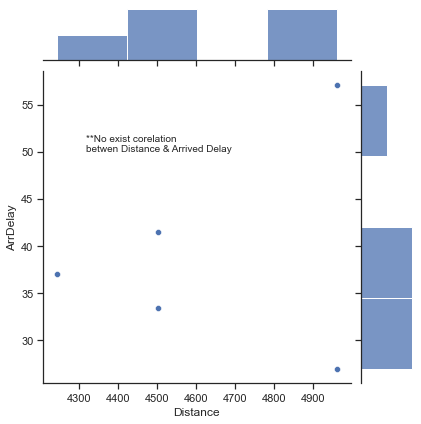

In [73]:
#Check impact of distance on arrive delay...
sns.jointplot(Table_Longer['Distance'],Table_Longer['ArrDelay'])
print ('          FIG.19 CORRELATION : DISTANCE - AARIVE DELAY'+ '')
plt.text(-10.9, 50, '**No exist corelation \nbetwen Distance & Arrived Delay')
warnings.filterwarnings('ignore')
plt.show()

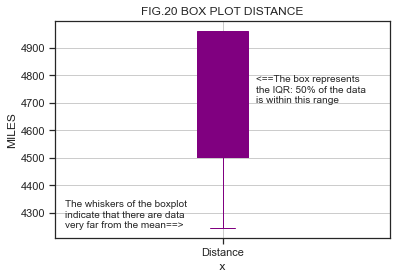

In [74]:
#Check data of distance...
np.random.seed(6000000)
boxplot = Table_Longer.boxplot(column=['Distance'], color='purple', patch_artist = True)
plt.text(1.1, 4700, '<==The box represents\nthe IQR: 50% of the data\nis within this range')
plt.text(.53, 4245, 'The whiskers of the boxplot\nindicate that there are data\nvery far from the mean==>')
plt.title('FIG.20 BOX PLOT DISTANCE')
plt.xlabel(' x ')
plt.ylabel('MILES')
boxplot.plot()
plt.show()

Text(0, 0.5, 'ARRIVE DELAY TIME')

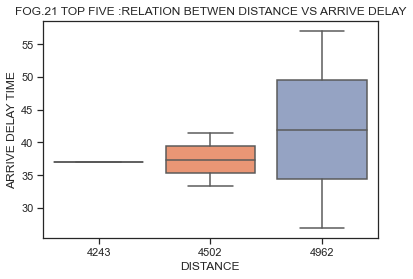

In [75]:
#Check distance vs arrive delay...
sns.set_palette('Set2')
sns.boxplot(data=Table_Longer, y='ArrDelay', x='Distance')
plt.title('FOG.21 TOP FIVE :RELATION BETWEN DISTANCE VS ARRIVE DELAY')
plt.xlabel('DISTANCE')
plt.ylabel('ARRIVE DELAY TIME')

<span style='color:purple'>
<h4>G)And the most backward?</span>

In [76]:
# Index table by Orig-Dest and ArrDelay
Table_List_Delay=listFlight1.groupby(['Flight_Origin_Dest','ArrDelay']).size().reset_index(name='Total')

# Sort by ArrDelay
Table_List_Delay.sort_values('ArrDelay', inplace =True, ascending=False)

print ('FIRST FIVE MOST BACKWARD ORIGIN-DESTINATION')
Table_Backward = Table_List_Delay.head(5)
Table_Backward

FIRST FIVE MOST BACKWARD ORIGIN-DESTINATION


,Flight_Origin_Dest,ArrDelay,Total
5871239,YUM - SLC,2461.0,0
5008319,SAT - MSP,2461.0,0
3801359,MSP - BGR,2461.0,0
2065367,FLG - PHX,2461.0,0
2620343,ICT - MSY,2461.0,0


Text(0.5, 1.0, 'FIG.22 TOP TEN TRIPS AFECTED DELAY FOR WEATHER')

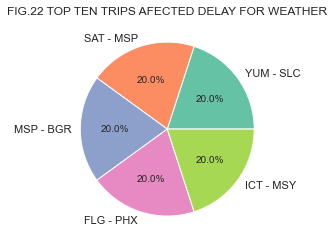

In [77]:
#Check trips afected for weather...
plt.pie(Table_Backward['ArrDelay'],labels=Table_Backward['Flight_Origin_Dest'], autopct='%1.1f%%')
plt.title('FIG.22 TOP TEN TRIPS AFECTED DELAY FOR WEATHER')

Text(0.5, 1.0, 'FIG.23 DENSITY FOR MONTH')

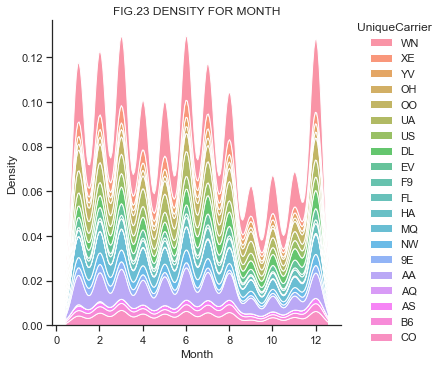

In [78]:
#Check density for month...
sns.displot(data=layout, x='Month', hue='UniqueCarrier', multiple='stack', kind='kde')
plt.title('FIG.23 DENSITY FOR MONTH')

Text(0.5, 1.0, 'FIG.24 PROPORTION FOR MONTH')

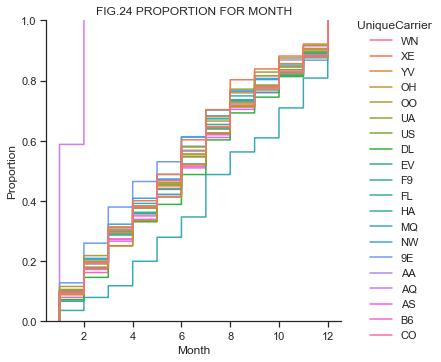

In [79]:
#Check proportion for month...
sns.displot(data=layout, x='Month', hue='UniqueCarrier', kind='ecdf')
plt.title('FIG.24 PROPORTION FOR MONTH')

No handles with labels found to put in legend.


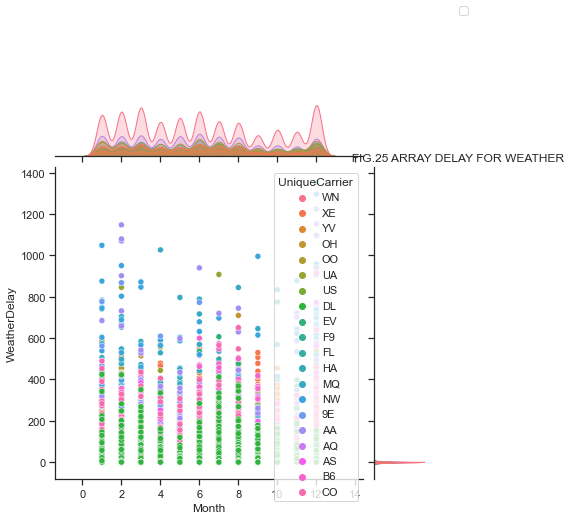

In [80]:
#Check arrival delays due to weather...
sns.jointplot(data=layout, x='Month', y='WeatherDelay', hue='UniqueCarrier', kind='scatter')
plt.legend(loc='center left', ncol=3, bbox_to_anchor=(1.5, 1.5))
plt.title('                                  FIG.25 ARRAY DELAY FOR WEATHER')
warnings.filterwarnings('ignore')

<span style='color:blue'>
<h4>EXTRA EXERCISE
    

Process Capability Analysis for Arrives in 2008

Process capability analysis represents a significant component of the Measure phase from the DMAIC (Define, Measure, Analysis, Improve, Control) cycle for Six Sigma methodology. This analysis measures how a process performance fits the customer’s requirements, which are translated into specification limits for the interesting characteristics of the product to be manufactured or produced. The results from this analysis may help industrial engineers identify variation within a process and develop further action plans that lead to better yield, lower variation, and fewer defects</span>

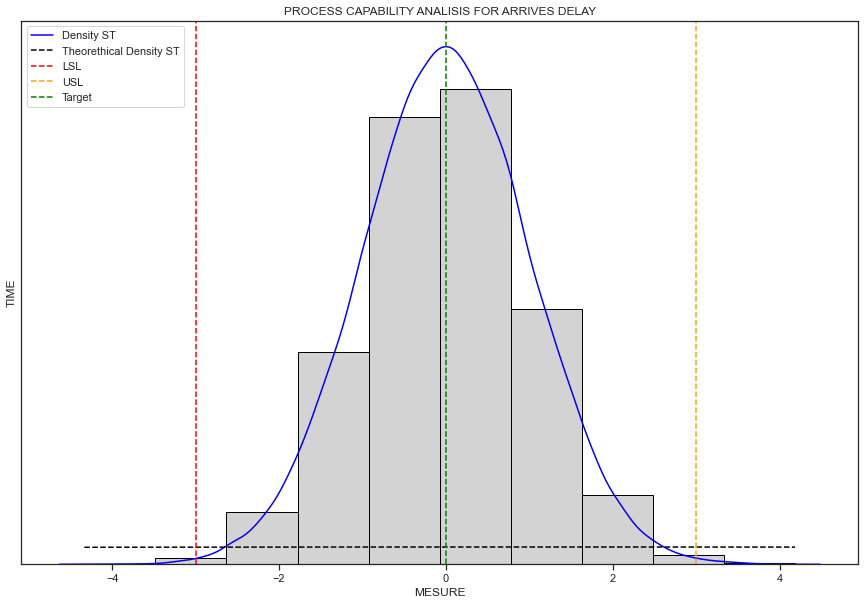

In [81]:
#Firstable set specification limits, this is a mesure that we or customer is willing to accept, 
#in this case we are going to stablish next limits (time delay in minutes):
#LSL = Upper Specification Limit
#USL = Lower Specification Limit
#rajet = the goal

target =0
LSL = -3
USL = 3

# We extract the column of data and a sample to generate normally distributed data points

layout_new = layout['ArrDelay']

layout_new = np.random.normal(loc=target,scale=1,size=100000)

# Generate probability density function 

x = np.linspace(min(layout_new), max(layout_new), 30)
y = norm.pdf(x, loc=1, scale=30)

# Plot histogram for data along with probability density functions and specification limits

plt.figure(figsize=(15,10))
plt.hist(layout_new, color='lightgrey', edgecolor='black', density=True)
sns.kdeplot(layout_new, color='blue', label='Density ST')
plt.plot(x, y, linestyle='--', color='black', label='Theorethical Density ST')
plt.axvline(LSL, linestyle='--', color='red', label='LSL')
plt.axvline(USL, linestyle='--', color='orange', label='USL')
plt.axvline(target, linestyle='--', color='green', label='Target')
plt.title('PROCESS CAPABILITY ANALISIS FOR ARRIVES DELAY')
plt.xlabel('MESURE')
plt.ylabel('TIME')
plt.yticks([])
plt.legend()
plt.show()

In [82]:
# Calculate capability of the process = Cp
Cp = (USL-LSL)/(6*np.std(layout_new))

# Calculate the adjusted capability index = Cpk
Cpk = min((USL-layout_new.mean())/(3*layout_new.std()), (layout_new.mean()-LSL)/(3*layout_new.std()))

# Calculate z-value "Nivel de 6Sigma"
z = min((USL-layout_new.mean())/(layout_new.std()), (layout_new.mean()-LSL)/(layout_new.std()))

# Get data summary statistics
num_samples = len(layout_new)
sample_mean = layout_new.mean()
sample_std = layout_new.std()
sample_max = layout_new.max()
sample_min = layout_new.min()
sample_median = np.median(layout_new)

# Get percentage of data points outside of specification limits
pct_below_LSL = len(layout_new[layout_new < LSL])/len(layout_new)*100
pct_above_USL = len(layout_new[layout_new > USL])/len(layout_new)*100

# Write .txt file with results

print('PROCESS CAPABILITY ANALYSIS FOR ARRAY DELAY 2008\n')
print('-----------------------------------\n')
print(f'Specifications\n')
print(f'Target: {target}\n')
print(f'LSL: {LSL}\n')
print(f'USL: {USL}\n')    
print('-----------------------------------\n')
print(f'Indices\n')
print(f'Cp: {round(Cp,2)}\n')
print(f'Cpk: {round(Cpk,2)}\n')
print(f'z: {round(z,2)}\n')
print('-----------------------------------\n')
print(f'Summary Statistics\n')
print(f'Number of samples: {round(num_samples,2)}\n')
print(f'Sample mean: {round(sample_mean,2)}\n')
print(f'Sample std: {round(sample_std,2)}\n')
print(f'Sample max: {round(sample_max,2)}\n')
print(f'Sample min: {round(sample_min,2)}\n')
print(f'Sample median: {round(sample_median,2)}\n')
print(f'Percentage of data points below LSL: {round(pct_below_LSL,2)}%\n')
print(f'Percentage of data points above USL: {round(pct_above_USL,2)}%\n')

PROCESS CAPABILITY ANALYSIS FOR ARRAY DELAY 2008

-----------------------------------

Specifications

Target: 0

LSL: -3

USL: 3

-----------------------------------

Indices

Cp: 1.0

Cpk: 1.0

z: 2.99

-----------------------------------

Summary Statistics

Number of samples: 100000

Sample mean: 0.0

Sample std: 1.0

Sample max: 4.18

Sample min: -4.33

Sample median: 0.0

Percentage of data points below LSL: 0.12%

Percentage of data points above USL: 0.16%

